# Timeseries Integration
*TS utilities in Qiskit*

By: Jacob Cybulski<br>
Date: August 2023 - March 2024<br>
Aims: The goal of this notebook is to test TS integration.

## Initial settings

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
import sys
sys.path.append('.')
sys.path.append('..')
sys.path

['/home/jacob/Dropbox/Dev/Python/quantum_projects/ts/ts_qae_sidekick/utils',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python310.zip',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.10',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.10/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.10/site-packages',
 '.',
 '..']

In [3]:

import os
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
from IPython.display import clear_output

from utils.Window import *
from utils.TS import *
from utils.Target import *
from utils.Charts import *
from utils.Integrate import *

from matplotlib import set_loglevel
set_loglevel("error")

%matplotlib inline

## Time series integration and plotting
The aim is to merge all windows produced in testing into a single sequence, stored as a dictionary. As depicted in the following figure, the integration procedure needs to average all overalapping windows values (white boxes), while considering the step between windows (which creates gaps between overlapping windows) and their edge trimming (which removes distorted values, indicated as gray boxes). 

<div>
    <!--img src="attachment:wind-integration.png" width="1000"-->
    <img src="../images/wind-integration.png" width="1000">
</div>

**Figure: Windows integration procedure**

## Sample data

In [4]:
samples = 114
split = 0.75
wind_size = 8
wind_step = 2
horizon = 1
scale = 1
pan = 0
noise = 0.05

In [5]:
FILE_PATH_MELB='../dataset/mlm-melbourne-daily-min-temperatures.csv'
FILE_PATH_DELHI='../dataset/kaggle-DailyDelhiClimateTest.csv'

In [6]:
### Select a target class and its parameters (see: utils.py), e.g.
#   Target_sin() # Target_2_sins() # Target_poly() # Target_poly_3()
#   Target_line() # Target_line(slope=0.5, intercept=0.2, xmin=0, xmax=1.5)
#   Target_trig_trend() # Target_jitter()
#   Target_beer() # Target_beer(pt_from=104, pt_to=156)
#   Target_csv_file(FILE_PATH_DELHI, col=1)

fun_train = Target_csv_file(FILE_PATH_DELHI, col=1)
sel_wind = 7

X_train_org, y_train_org, X_valid_org, y_valid_org = \
    gen_ts_windows(fun_train, samples, split, wind_size, wind_step, differencing=True, noise=False)
X_train_whisp, y_train_whisp, X_valid_whisp, y_valid_whisp = \
    gen_ts_windows(fun_train, samples, split, wind_size, wind_step, differencing=True, noise=noise*2/5)
X_train_noise, y_train_noise, X_valid_noise, y_valid_noise = \
    gen_ts_windows(fun_train, samples, split, wind_size, wind_step, differencing=True, noise=noise)

Selected Data

Function: Target_csv_file, Eps: 0.1
Samples: 114, Split: 0.75, Train Samples: 86, Valid Samples: 28
Window Size: 8, Step: 2, Horizon: 0
Training Windows: 40, Validation Windows: 14
Selected Data

Function: Target_csv_file, Eps: 0.1
Samples: 114, Split: 0.75, Train Samples: 86, Valid Samples: 28
Window Size: 8, Step: 2, Horizon: 0
Training Windows: 40, Validation Windows: 14
Selected Data

Function: Target_csv_file, Eps: 0.1
Samples: 114, Split: 0.75, Train Samples: 86, Valid Samples: 28
Window Size: 8, Step: 2, Horizon: 0
Training Windows: 40, Validation Windows: 14


### Windows integration

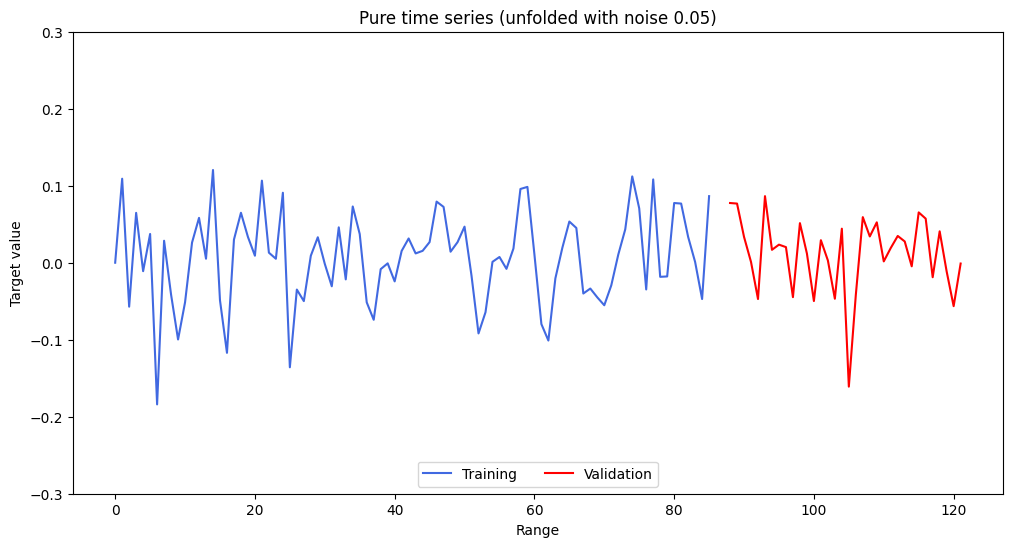

In [7]:
y_train_org_set = qae_winds_integ_1(qae_wind_to_dict(y_train_org, 0, wind_step))
y_valid_org_set = qae_winds_integ_1(qae_wind_to_dict(y_valid_org, (y_train_org.shape[0]+4)*wind_step, wind_step))
qae_seq_1_plot(y_train_org_set | y_valid_org_set, ylim=(-0.3, 0.3), 
               title=f'Pure time series (unfolded with noise {noise})', xlabel='Range', ylabel='Target value')

y_train_whisp_set = qae_winds_integ_1(qae_wind_to_dict(y_train_whisp, 0, wind_step))
y_train_noise_set = qae_winds_integ_1(qae_wind_to_dict(y_train_noise, 0, wind_step))


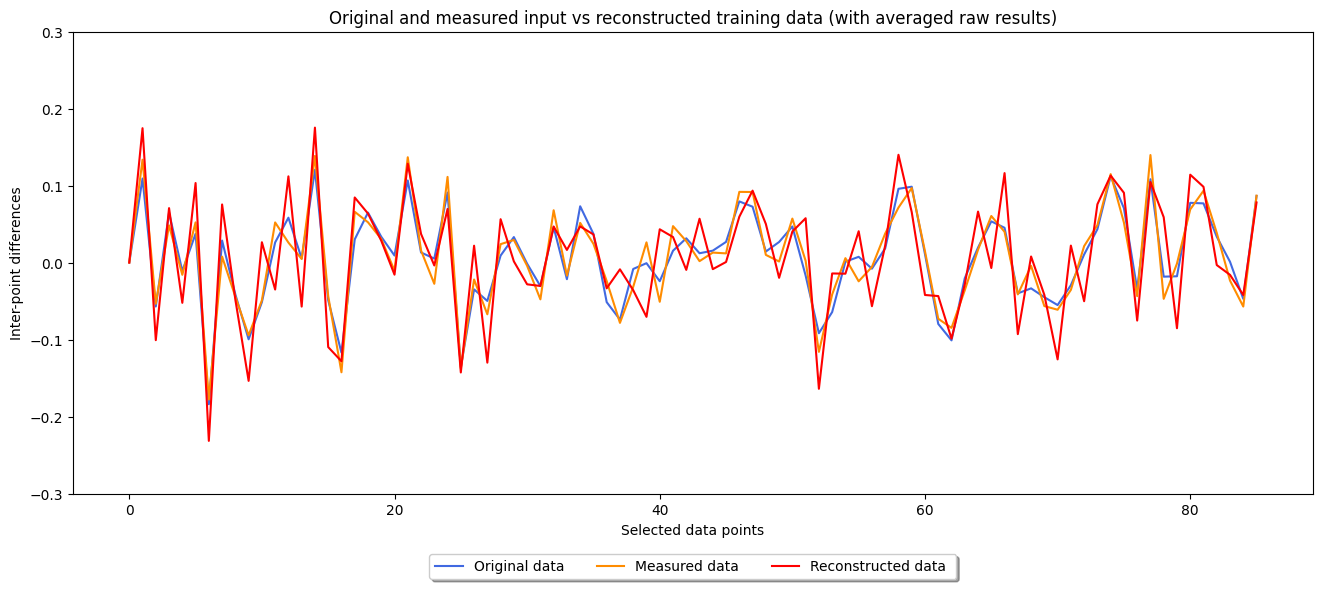

In [8]:
# Plot all raw results
y_train_org_seq, y_train_whisp_seq, y_train_noise_seq = qae_winds_integ(y_train_org_set, y_train_whisp_set, y_train_noise_set)
qae_seq_plot(y_train_org_seq, y_train_whisp_seq, y_train_noise_seq, title=f'Original and measured input vs reconstructed training data (with averaged raw results)',
             label_suffix=[f'', f'', f''], ylim=(-0.3, 0.3), rcParams=(16, 6))

# Software in use

In [9]:
!pip list | grep -E 'qiskit|torch'

qiskit                        0.45.2
qiskit-aer-gpu                0.13.2
qiskit-algorithms             0.2.2
qiskit-dynamics               0.4.3
qiskit-finance                0.4.0
qiskit-ibm-provider           0.6.3
qiskit-ibm-runtime            0.11.3
qiskit-ibmq-provider          0.20.2
qiskit-machine-learning       0.7.1
qiskit-nature                 0.7.1
qiskit-optimization           0.6.0
qiskit-qasm3-import           0.4.1
qiskit-sphinx-theme           1.12.1
qiskit-terra                  0.45.2
torch                         2.1.0
torchaudio                    2.1.0
torchsummary                  1.5.1
torchvision                   0.16.0
